# Part 3: Neural Network and KNN

## Importing required libraries

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn

## Loading Data

In [2]:
data=pd.read_csv('./network_backup_dataset.csv')
datanp = np.array(data.values)
X_train = datanp[:,[0,1,2,3,4]]
Y_train = datanp[:,[5]]
Y_train = Y_train.flatten()
Y_train = list(map(float,Y_train))
Y_train = np.asarray(Y_train)

## Using Label Encoding

In [3]:
for i in range(0,5):
    labelencoder_X_0 = LabelEncoder()
    X_train[:,i] = labelencoder_X_0.fit_transform(X_train[:,i])

## Transform function for one hot encoding


In [4]:
def transform(X_train, trans_list):
    hot = list()
    for i in range(0, len(trans_list)):
        if(trans_list[i] == 1):
            hot.append(i)
    onehotencoder = OneHotEncoder(categorical_features = hot, sparse = False)
    return onehotencoder.fit_transform(X_train)

In [5]:
#Hot encoding for NN
X_train = transform(X_train,[1,1,1,1,1])

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Now use a neural network regression model (one hidden layer) with all featuresone-hot encoded. 
Parameters:
* Number of hidden units
* Activity Function(relu, logistic, tanh)
Plot Test-RMSE as a function of the number of hidden units for different activity functions. 

Report the best combination.

## Cross-validation

In [6]:
kf = KFold(n_splits = 10)
kf.get_n_splits(X_train)
x = 0
y = 0 
for train, test in kf.split(X_train):
    x = train
    y = test
    break

## Getting best parameters for neural network

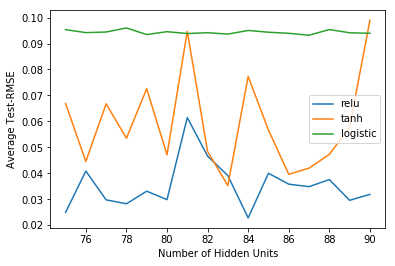

In [7]:
max = 100
max_i = "f"
max_j = 0
plt.close()
plt.xlabel("Number of Hidden Units")
plt.ylabel("Average Test-RMSE")
for i in ['relu', 'tanh', 'logistic']:
    test_rmse = list()
    for j in range(75,91):
        v = [j]
        lr = MLPRegressor(hidden_layer_sizes = v,activation= i)
        lr.fit(X_train[x],Y_train[x])
        temp = math.sqrt(metrics.mean_squared_error(Y_train[y], lr.predict(X_train[y])))
        test_rmse.append(temp)
        if(temp < max):
            max = temp
            max_i = i
            max_j = j
    plt.plot(range(75,91),test_rmse,label= i)
plt.legend()
plt.savefig("nn_comparison.png")
plt.show()
plt.close()

In [8]:
print("Best Parameters for Neural Network")
print("Best Activation Function " + max_i)
print("Best number of Hidden Units " + str(max_j))

Best Parameters for Neural Network
Best Activation Function relu
Best number of Hidden Units 84


## Train_rmse and Test_rmse

In [9]:
kf = KFold(n_splits = 10)
train_rmse = list()
test_rmse = list()
kf.get_n_splits(X_train)
for train, test in kf.split(X_train):
    lr = MLPRegressor(hidden_layer_sizes = max_j,activation= max_i)
    lr.fit(X_train[train],Y_train[train])
    temp = math.sqrt(metrics.mean_squared_error(Y_train[test], lr.predict(X_train[test])))
    test_rmse.append(temp)
    train_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[train], lr.predict(X_train[train]))))

print("Average Train-RMSE for best Neural Network")
print(str(np.average(train_rmse)))
print("Average Test-RMSE for best Neural Network")
print(str(np.average(test_rmse)))

Average Train-RMSE for best Neural Network
0.017561868710705635
Average Test-RMSE for best Neural Network
0.035869369054191275


## Plot function for NN

In [11]:
def plot_nn(predictions, Y_train):
    plt.close()
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Fitted Values vs True Values")
    plt.scatter(range(0,len(Y_train)),Y_train,label='True')
    plt.scatter(range(0,len(Y_train)),predictions, label ='Fitted')
    plt.legend()
    plt.savefig("nn1.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("True Values")
    plt.ylabel("Prediction Values")
    plt.scatter(Y_train,predictions)
    plt.savefig("nn2.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Residual Values vs Predicted Values")
    plt.scatter(range(0,len(Y_train)),predictions,label='Fitted')
    plt.scatter(range(0,len(Y_train)),Y_train-predictions, label ='Residual')
    plt.legend()
    plt.savefig("nn3.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Prediction Values")
    plt.ylabel("Residual Values")
    plt.scatter(predictions,Y_train-predictions)
    plt.savefig("nn4.png")
    plt.show()
    plt.close()

Best Neural Network model with hidden layer size 84 and activation function relu


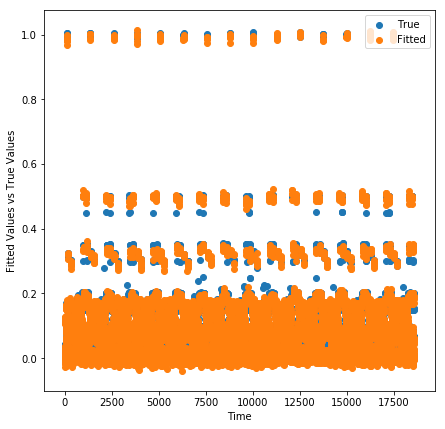

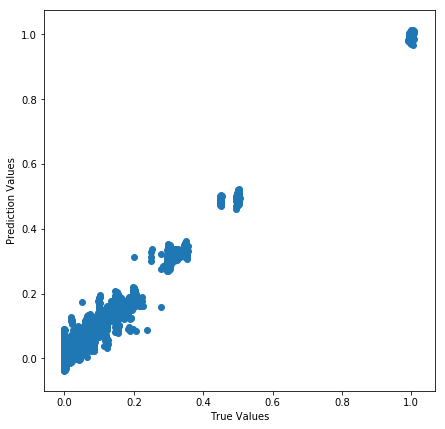

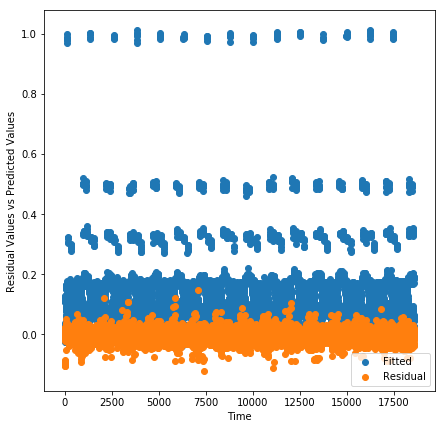

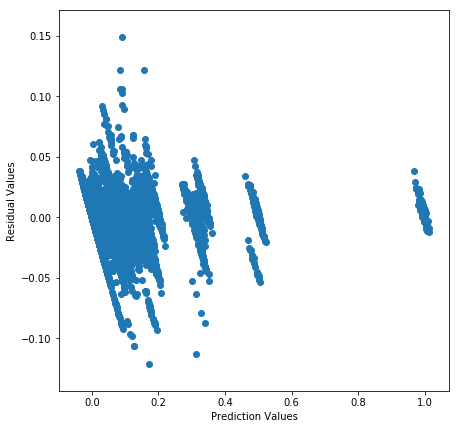

In [12]:
lr = MLPRegressor(hidden_layer_sizes = max_j,activation=max_i)
lr.fit(X_train,Y_train)
predictions = lr.predict(X_train)
print("Best Neural Network model with hidden layer size "+str(max_j)+" and activation function "+max_i)
plot_nn(predictions, Y_train)


## KNN regression

### Best parameter

In [13]:
max = 100
max_i = 0
for i in range(2,11):
    lr = sklearn.neighbors.KNeighborsRegressor(n_neighbors= i)
    lr.fit(X_train[x],Y_train[x])
    temp = math.sqrt(metrics.mean_squared_error(Y_train[y], lr.predict(X_train[y])))
    if(temp < max):
        max = temp
        max_i = i
print("Best k neighbour "+ str(max_i))


Best k neighbour 10


## Train and Test RMSE

In [14]:
kf = KFold(n_splits = 10)
train_rmse = list()
test_rmse = list()
kf.get_n_splits(X_train)
for train, test in kf.split(X_train):
    lr = sklearn.neighbors.KNeighborsRegressor(n_neighbors= max_i)
    lr.fit(X_train[train],Y_train[train])
    temp = math.sqrt(metrics.mean_squared_error(Y_train[test], lr.predict(X_train[test])))
    test_rmse.append(temp)
    train_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[train], lr.predict(X_train[train]))))

print("Average Train-RMSE for best KNN")
print(str(np.average(train_rmse)))
print("Average Test-RMSE for best KNN")
print(str(np.average(test_rmse)))

Average Train-RMSE for best KNN
0.039786635525431005
Average Test-RMSE for best KNN
0.025471669774127716


## Plot figure

In [15]:
def plot(predictions, Y_train):
    plt.close()
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Fitted Values vs True Values")
    plt.scatter(range(0,len(Y_train)),Y_train,label='True')
    plt.scatter(range(0,len(Y_train)),predictions, label ='Fitted')
    plt.legend()
    plt.savefig("knn1.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("True Values")
    plt.ylabel("Prediction Values")
    plt.scatter(Y_train,predictions)
    plt.savefig("knn2.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Residual Values vs Predicted Values")
    plt.scatter(range(0,len(Y_train)),predictions,label='Fitted')
    plt.scatter(range(0,len(Y_train)),Y_train-predictions, label ='Residual')
    plt.legend()
    plt.savefig("knn3.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Prediction Values")
    plt.ylabel("Residual Values")
    plt.scatter(predictions,Y_train-predictions)
    plt.savefig("knn4.png")
    plt.show()
    plt.close()
    

Best KNN model with Best Neighbors 10


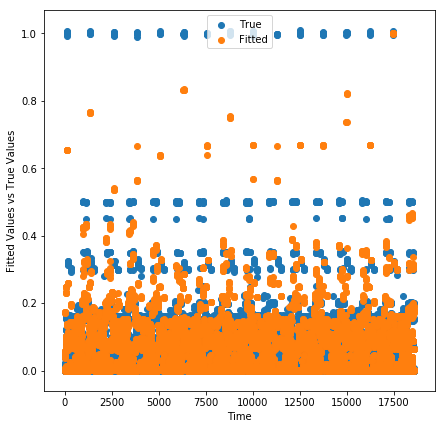

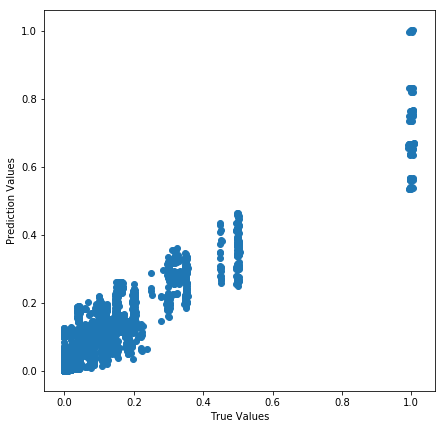

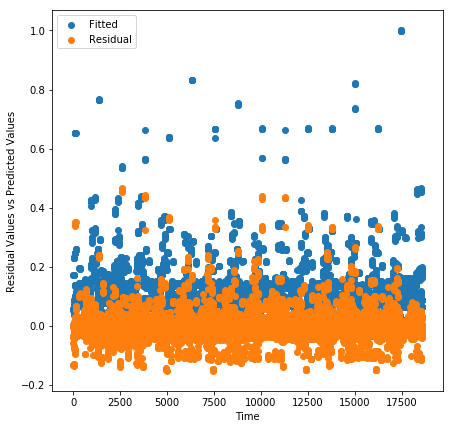

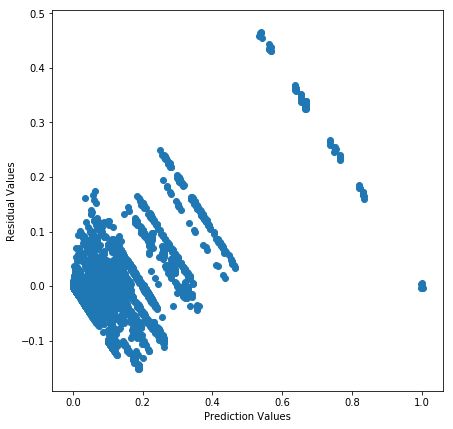

In [16]:
lr = sklearn.neighbors.KNeighborsRegressor(n_neighbors= max_i)
lr.fit(X_train,Y_train)
predictions = lr.predict(X_train)
print("Best KNN model with Best Neighbors "+str(max_i))
plot(predictions, Y_train)